# Pymaceuticals Inc

In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(study_results, mouse_metadata, on=["Mouse ID"], how="left")

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [50]:
# Checking the number of mice.
mouse_study_df["Mouse ID"].nunique()

249

In [51]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicates = mouse_study_df[mouse_study_df.duplicated(["Mouse ID", "Timepoint"])]
duplicates["Mouse ID"].unique()

array(['g989'], dtype=object)

In [52]:
# Optional: Get all the data for the duplicate mouse ID. 
dupped_mouse = mouse_study_df.loc[(mouse_study_df["Mouse ID"] == "g989")]
dupped_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [53]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_study_df = pd.DataFrame(mouse_study_df.loc[(mouse_study_df["Mouse ID"] != "g989")])
cleaned_mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [54]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_study_df["Mouse ID"].nunique()

248

## Summary Statistics

In [55]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

regimen_grouped = cleaned_mouse_study_df.groupby("Drug Regimen")


drug_mean = pd.Series((regimen_grouped["Tumor Volume (mm3)"].mean()), name="Mean Tumor Volume")
drug_median = pd.Series((regimen_grouped["Tumor Volume (mm3)"].median()), name="Median Tumor Volume")
drug_variance = pd.Series((regimen_grouped["Tumor Volume (mm3)"].var()), name="Tumor Volume Variance")
drug_stddev = pd.Series((regimen_grouped["Tumor Volume (mm3)"].std()), name="Tumor Volume Std. Dev.")
drug_stderr = pd.Series((regimen_grouped["Tumor Volume (mm3)"].sem()), name="Tumor Volume Std. Err.")

tumor_results = [drug_mean, drug_median, drug_variance, drug_stddev, drug_stderr]
tumor_summary = pd.DataFrame(pd.concat(tumor_results, axis=1))
tumor_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


### Bar and Pie Charts

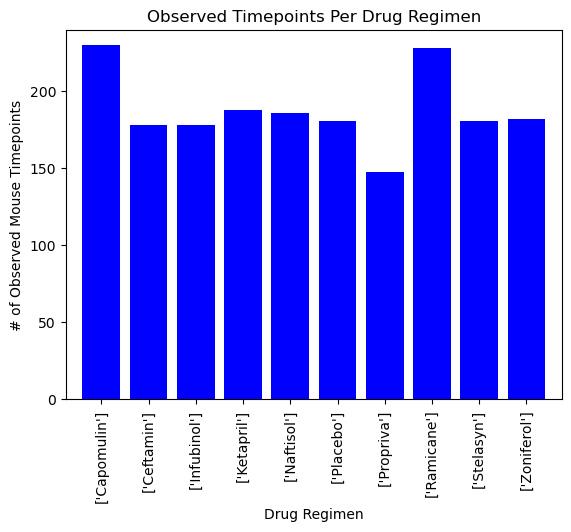

In [56]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

#bar labels
drugs = (regimen_grouped["Drug Regimen"].unique())

#x-axis & y-axis defined
x_axis = np.arange(len(regimen_grouped["Drug Regimen"]))
timepoint_counted = regimen_grouped["Timepoint"].count()

#plot
plt.bar(x_axis, timepoint_counted, color="b", align="center")

#name xticks
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs, rotation=90)

#limits
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(timepoint_counted)+10)

#other labels
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Observed Timepoints Per Drug Regimen")

plt.show()


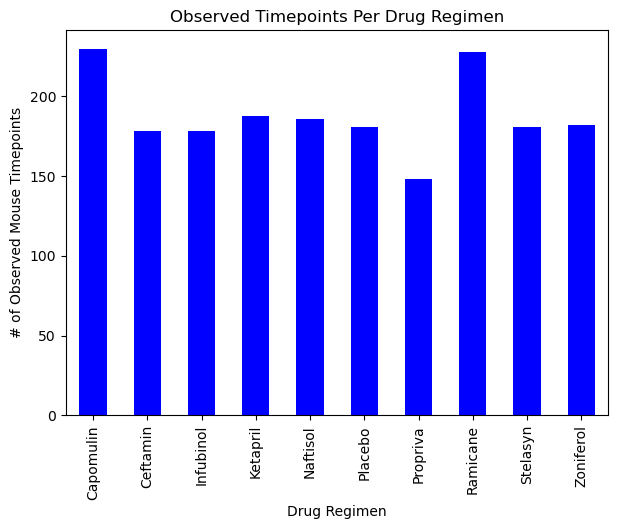

<Figure size 640x480 with 0 Axes>

In [57]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

#axis defined
drug_groups = cleaned_mouse_study_df.groupby("Drug Regimen")
timepoints_count = drug_groups["Timepoint"].count()

#plot
bar_chart = timepoints_count.plot(kind="bar", color="blue", figsize=(7,5), title="Observed Timepoints Per Drug Regimen")

#ylabel
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()
plt.tight_layout()

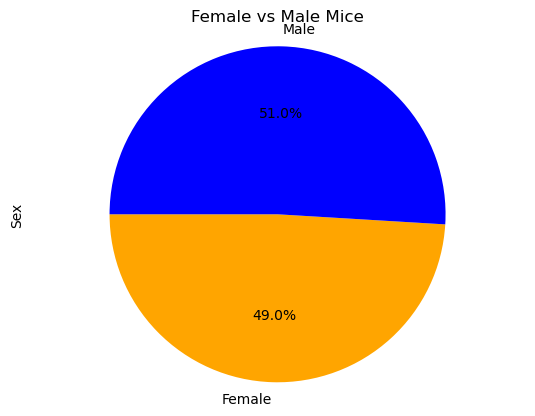

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#section labels
sex = ["Female", "Male"]

#section colours
colours = ["orange", "blue"]

#section values
sex_grouped = cleaned_mouse_study_df.groupby("Sex")
sex_count = sex_grouped["Sex"].count()

#plot
plt.pie(sex_count, labels=sex, colors=colours, autopct="%1.1f%%", startangle=180)

#tidy
plt.title("Female vs Male Mice")
plt.axis("equal")
plt.ylabel("Sex")

plt.show()

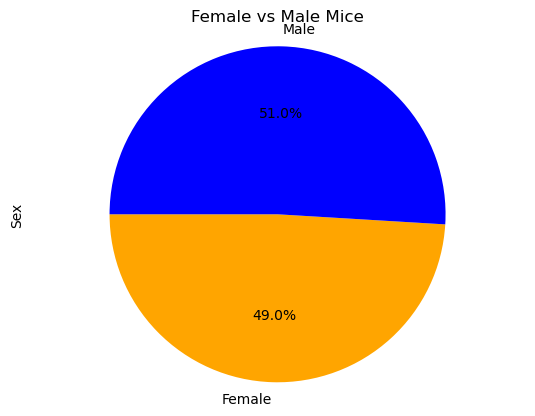

In [59]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#section values
sex_count = sex_grouped["Sex"].count()

#section colours
colours = ["orange", "blue"]

#plot
pie_chart = sex_count.plot(kind="pie", y=sex_count, title="Female vs Male Mice", startangle=180, \
                           colors=colours, autopct="%1.1f%%")
#tidy
pie_chart.set_ylabel("Sex")
plt.axis("equal")

plt.show()

### Quartiles, Outliers and Boxplots

In [60]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_value = pd.DataFrame(cleaned_mouse_study_df.groupby("Mouse ID")["Timepoint"].max())

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

#merge original with last_value
last_merged = pd.merge(cleaned_mouse_study_df, last_value, on=["Mouse ID"], how="inner")
last_merged = last_merged.rename(columns={"Timepoint_x": "Timepoint", "Timepoint_y": "Last Timepoint"})
last_merged

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Last Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45
...,...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17,45
1876,m601,30,31.758275,1,Capomulin,Male,22,17,45
1877,m601,35,30.834357,1,Capomulin,Male,22,17,45
1878,m601,40,31.378045,1,Capomulin,Male,22,17,45


In [61]:
#reduce to be only the 4 drug regimens being looked at
last_merged_reduced = last_merged.loc[(last_merged["Drug Regimen"]=="Capomulin") | \
                                             (last_merged["Drug Regimen"]=="Ramicane") | \
                                             (last_merged["Drug Regimen"]=="Infubinol") | \
                                             (last_merged["Drug Regimen"]=="Ceftamin")]


#reduce to be only the rows relating to the last timepoint for each mouse
last_merged_reduced_timepoint = last_merged_reduced.loc[(last_merged_reduced["Timepoint"]\
                                                         ==last_merged_reduced["Last Timepoint"])]
#reset index
last_merged_reduced_timepoint.reset_index(inplace=True, drop=True)
last_merged_reduced_timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Last Timepoint
0,b128,45,38.982878,2,Capomulin,Female,9,22,45
1,c326,5,36.321346,0,Infubinol,Female,18,25,5
2,c139,45,72.226731,2,Infubinol,Male,11,28,45
3,v339,5,46.250112,0,Infubinol,Male,20,26,5
4,a577,30,57.031862,2,Infubinol,Female,6,25,30
...,...,...,...,...,...,...,...,...,...
95,t565,45,34.455298,0,Capomulin,Female,20,17,45
96,i557,45,47.685963,1,Capomulin,Female,1,24,45
97,m957,45,33.329098,1,Capomulin,Female,3,19,45
98,f966,20,30.485985,0,Capomulin,Male,16,17,20


In [62]:
# Put treatments into a list for for loop (and later for plot labels)
drugs_selection = (last_merged_reduced_timepoint["Drug Regimen"].unique())
treatments = [i for i in drugs_selection]
#treatments

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

#fill tumor volume list
tumor_volume.append(last_merged_reduced_timepoint["Tumor Volume (mm3)"])
tumor_volume

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
      # Locate the rows which contain mice on each drug and get the tumor volumes
        # add subset 
            # Determine outliers using upper and lower bounds

tumor_vol_list = (last_merged_reduced_timepoint.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(list))


for x in treatments:
    tumor_x = pd.DataFrame(tumor_vol_list[x])
    tumor_x["Tumor Volume (mm3)"] = tumor_x
    quartiles_x = tumor_x["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq_x = quartiles_x[0.25]
    upperq_x = quartiles_x[0.75]
    iqr_x = upperq_x - lowerq_x
    lower_bound_x = lowerq_x - (1.5*iqr_x)
    upper_bound_x = upperq_x + (1.5*iqr_x)
    bounds_x = (tumor_x.loc[(tumor_x["Tumor Volume (mm3)"] < lower_bound_x) | tumor_x["Tumor Volume (mm3)"] > upper_bound_x])
    bounds_series_x = [b for b in bounds_x["Tumor Volume (mm3)"]]
    print(bounds_series_x)


[]
[]
[]
[]


##### my attempts at using for loop to calculate IQR where unsuccessful, reverted to doing them individually so that I could proceed with the boxplot

In [63]:
# Put treatments into a list for for loop (and later for plot labels)
drugs_reduced = (last_merged_reduced_timepoint["Drug Regimen"].unique())
treatments_reduced = [i for i in drugs_reduced]
#treatments_reduced

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_red = (last_merged_reduced_timepoint.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(list))
#tumor_vol_red

#________________________________________________________________________
#Capomulin Results

cap_tumor_red = pd.DataFrame(tumor_vol_red["Capomulin"])
cap_tumor_red["Tumor Volume (mm3)"] = cap_tumor_red

#IQR
quartiles_r = cap_tumor_red["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq_r = quartiles_r[.25]
upperq_r = quartiles_r[0.75]
iqr_r = upperq_r-lowerq_r

#upper & lower bounds
lower_bound_r = lowerq_r - (1.5*iqr_r)
upper_bound_r = upperq_r + (1.5*iqr_r)

#identify outliers
cap_bounds_r = (cap_tumor_red.loc[(cap_tumor_red["Tumor Volume (mm3)"] < lower_bound_r) | (cap_tumor_red["Tumor Volume (mm3)"] > upper_bound_r)])
cap_bounds_series_r = [i for i in cap_bounds_r["Tumor Volume (mm3)"]]

#________________________________________________________________________
#Ramicane Results

ram_tumor_red = pd.DataFrame(tumor_vol_red["Ramicane"])
ram_tumor_red["Tumor Volume (mm3)"] = ram_tumor_red

#IQR
ram_quartiles_r = ram_tumor_red["Tumor Volume (mm3)"].quantile([.25,.5,.75])
ram_lowerq_r = ram_quartiles_r[.25]
ram_upperq_r = ram_quartiles_r[0.75]
ram_iqr_r = ram_upperq_r-ram_lowerq_r

#upper and lower bounds
ram_lower_bound_r = ram_lowerq_r - (1.5*ram_iqr_r)
ram_upper_bound_r = ram_upperq_r + (1.5*ram_iqr_r)

#identify outliers
ram_bounds_r = (ram_tumor_red.loc[(ram_tumor_red["Tumor Volume (mm3)"] < ram_lower_bound_r) | (ram_tumor_red["Tumor Volume (mm3)"] > ram_upper_bound_r)])
ram_bounds_series_r = [i for i in ram_bounds_r["Tumor Volume (mm3)"]]

#________________________________________________________________________
#Infubinol Results

inf_tumor_red = pd.DataFrame(tumor_vol_red["Infubinol"])
inf_tumor_red["Tumor Volume (mm3)"] = inf_tumor_red

#IQR
inf_quartiles_r = inf_tumor_red["Tumor Volume (mm3)"].quantile([.25,.5,.75])
inf_lowerq_r = inf_quartiles_r[.25]
inf_upperq_r = inf_quartiles_r[0.75]
inf_iqr_r = inf_upperq_r-inf_lowerq_r

#upper and lower bounds
inf_lower_bound_r = inf_lowerq_r - (1.5*inf_iqr_r)
inf_upper_bound_r = inf_upperq_r + (1.5*inf_iqr_r)

#identify outliers
inf_bounds_r = (inf_tumor_red.loc[(inf_tumor_red["Tumor Volume (mm3)"] < inf_lower_bound_r) | (inf_tumor_red["Tumor Volume (mm3)"] > inf_upper_bound_r)])
inf_bounds_series_r = [i for i in inf_bounds_r["Tumor Volume (mm3)"]]

#________________________________________________________________________
#Ceftamin Results

cef_tumor_red = pd.DataFrame(tumor_vol_red["Ceftamin"])
cef_tumor_red["Tumor Volume (mm3)"] = cef_tumor_red

#IQR    
cef_quartiles_r = cef_tumor_red["Tumor Volume (mm3)"].quantile([.25,.5,.75])
cef_lowerq_r = cef_quartiles_r[.25]
cef_upperq_r = cef_quartiles_r[0.75]
cef_iqr_r = cef_upperq_r-cef_lowerq_r

#upper and lower bounds
cef_lower_bound_r = cef_lowerq_r - (1.5*cef_iqr_r)
cef_upper_bound_r = cef_upperq_r + (1.5*cef_iqr_r)

#identify outliers
cef_bounds_r = (cef_tumor_red.loc[(cef_tumor_red["Tumor Volume (mm3)"] < cef_lower_bound_r) | (cef_tumor_red["Tumor Volume (mm3)"] > cef_upper_bound_r)])
cef_bounds_series_r = [i for i in cef_bounds_r["Tumor Volume (mm3)"]]
#cef_bounds_series_r

print(f"Capomulin's potential outliers: {cap_bounds_series_r}")
print(f"Ramicane's potential outliers: {ram_bounds_series_r}")
print(f"Infubinol's potential outliers: {inf_bounds_series_r}")
print(f"Ceftamin's potential outliers: {cef_bounds_series_r}")

Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


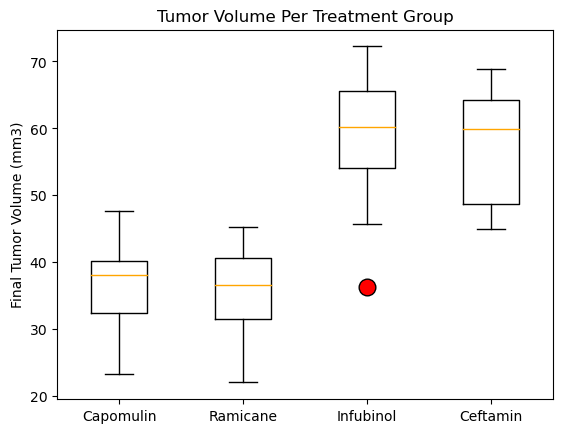

In [64]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

#compile data
mouse_data = pd.DataFrame({"Capomulin": cap_tumor_red["Tumor Volume (mm3)"], "Ramicane": ram_tumor_red["Tumor Volume (mm3)"],\
                     "Infubinol": inf_tumor_red["Tumor Volume (mm3)"], "Ceftamin": cef_tumor_red["Tumor Volume (mm3)"]})

#styles
outlier = dict(marker="o", markerfacecolor="red", markersize=12, markeredgecolor="black")
boxplot = dict(color="black")
median = dict(color="orange")
whiskers = dict(color="black")
caps = dict(color="black")

#plot
ax = mouse_data[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]].plot(kind="box", flierprops=outlier, \
                                                                         boxprops=boxplot, medianprops=median,\
                                                                         whiskerprops=whiskers, capprops=caps,\
                                                                         title="Tumor Volume Per Treatment Group")
#label
plt.ylabel("Final Tumor Volume (mm3)")

plt.show()

### Line and Scatter Plots

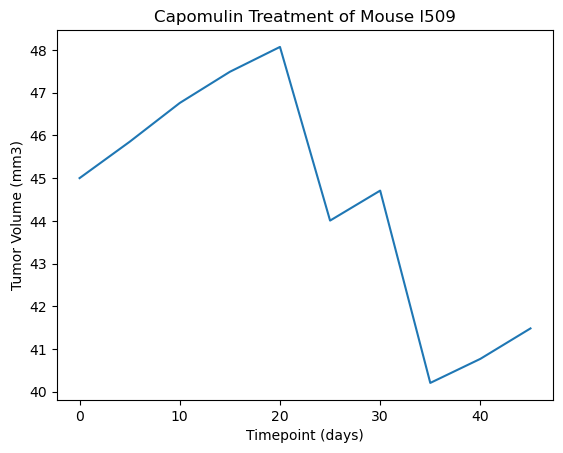

In [65]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
one_mouse = pd.DataFrame(cleaned_mouse_study_df.loc[(cleaned_mouse_study_df["Mouse ID"]=="l509")])

one_mouse_vol_series = [m for m in one_mouse["Tumor Volume (mm3)"]]
one_mouse_vol_series

one_mouse_time_series = [t for t in one_mouse["Timepoint"]]
one_mouse_time_series

x_axis = one_mouse_time_series
y_axis = one_mouse_vol_series


plt.plot(x_axis, y_axis)

plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

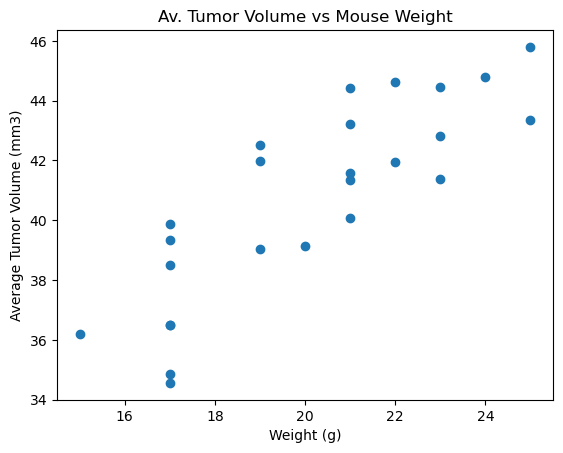

In [66]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
one_regimen = pd.DataFrame(cleaned_mouse_study_df.loc[(cleaned_mouse_study_df["Drug Regimen"]=="Capomulin")])

mouse_grouped = pd.DataFrame(one_regimen.groupby("Mouse ID"))
mouse_weight = one_regimen.groupby("Mouse ID")["Weight (g)"].first()
average_vol = one_regimen.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

plt.scatter(mouse_weight, average_vol)

plt.title("Av. Tumor Volume vs Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

### Correlation and Regression

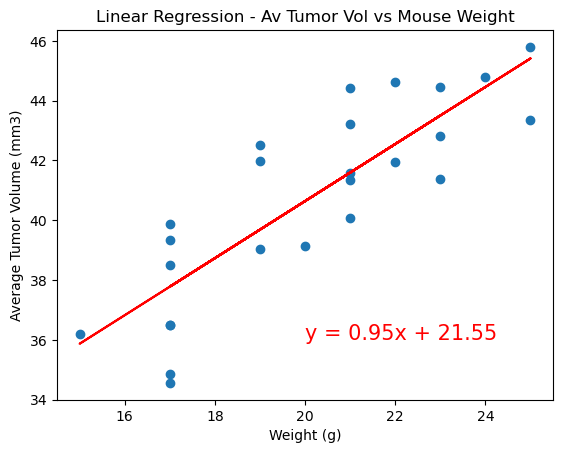

In [67]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

mouse_slope, mouse_int, mouse_r, mouse_p, mouse_std_err = st.linregress(mouse_weight, average_vol)
mouse_fit = mouse_slope*mouse_weight+mouse_int

line_equation = "y = " + str(round(mouse_slope, 2)) + "x + " + str(round(mouse_int, 2))

plt.scatter(mouse_weight, average_vol)
plt.plot(mouse_weight, mouse_fit, color="red")

plt.title("Linear Regression - Av Tumor Vol vs Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.annotate(line_equation,(20,36),fontsize=15,color="red")

plt.show()